In [1]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "D:\\WA_sorter\\sorterpics\\training"
valid_dir = "D:\\WA_sorter\\sorterpics\\validation"

train_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')


valid_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(200,200),
                                                    class_mode='binary',
                                                    batch_size=5)

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(200,200),
                                                    class_mode='binary',
                                                    batch_size=5)

Found 190 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

vgg_model = VGG16(include_top=False, input_shape=(200, 200, 3))

for layer in vgg_model.layers:
    layer.trainable=False

flat1 = Flatten()(vgg_model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)

model = Model(inputs = vgg_model.inputs, outputs = output)

In [4]:
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)      

In [5]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs=10, verbose=1)

Epoch 1/10
38/38 [==============================] - 13s 348ms/step - loss: 1.3092 - accuracy: 0.7316 - val_loss: 0.1591 - val_accuracy: 0.9000
Epoch 2/10
38/38 [==============================] - 11s 280ms/step - loss: 0.1069 - accuracy: 0.9526 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 11s 283ms/step - loss: 0.1071 - accuracy: 0.9632 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 11s 288ms/step - loss: 0.0338 - accuracy: 0.9789 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 11s 290ms/step - loss: 0.0683 - accuracy: 0.9789 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 10s 269ms/step - loss: 0.0443 - accuracy: 0.9789 - val_loss: 0.3978 - val_accuracy: 0.8000
Epoch 7/10
38/38 [==============================] - 10s 273ms/step - loss: 0.0293 - accuracy: 0.9842 - val_loss: 0.0180 - val_accuracy: 1.0000

In [29]:
model.save("VGG_whatsapp_sorter.h5")
print("Saved model to disk")

Saved model to disk


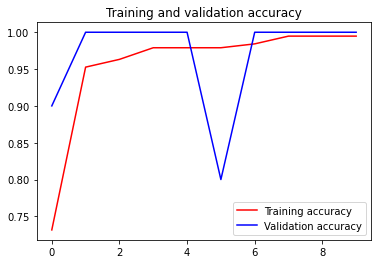

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [7]:
import numpy as np

In [25]:
path = 'D:\\WA_sorter\\sorterpics\\testing\\people\\6.jpg' 
img = image.load_img(path, target_size=(200,200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

In [27]:
print(classes)

[[1.]]


In [28]:
if classes[0][0] == 0:
    print("The Photo is a meme")
else:
    print("The photo is of people")
        

The photo is of people
